<a href="https://colab.research.google.com/github/tohnperfect/bsc_dpdm24/blob/main/Chapter_3_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir('/content/drive/MyDrive/bsc_dpdm24_data')

!pwd # เช็ค path ที่กำลังทำงานอยู่

/content/drive/MyDrive/bsc_dpdm24_data


In [4]:
unit_type_data = pd.read_csv("/content/drive/MyDrive/bsc_dpdm24_data/opendata_unittype.csv")

## Data exploration

In [5]:
unit_type_data.head()

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,count_room_kitchen,count_room_living,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype,day
0,4441,unittype_11075,project_3853,4 Bedroom,2,Condo,คอนโด,NaN,250.0,50200000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:20:56,2020-10-14 00:57:57,baania,https://baania.com/th/project/โดมัส-16-3853/4-...,2023-08-31
1,28021,unittype_18174,project_7334,ทาวน์โฮมสองชั้น,3,Townhome,ทาวน์โฮม,NaN,132.0,3666666.0,...,NaN,1.0,NaN,NaN,NaN,2020-12-04 10:37:28,2020-10-14 00:43:47,baania,https://baania.com/th/project/บ้านเมฆธารา-2-73...,2023-08-31
2,14541,unittype_35595,project_15267,1 Bedroom,2,Condo,คอนโด,NaN,45.0,3250000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:20:30,2020-10-14 00:55:24,baania,https://baania.com/th/project/เดอะ-เซสท์-ลาดพร...,2023-08-31
3,21478,6305c503713e23001a6a67b3,6305c4af713e23001a6a67af,1 Bedroom,2,Condo,คอนโด,NaN,25.0,989000.0,...,NaN,NaN,NaN,NaN,NaN,2023-05-31 14:30:02,2023-05-31 14:13:32,baania,https://baania.com/th/project/เสนาคิทท์-บางนา-...,2023-08-31
4,11573,unittype_34957,project_5556,บ้านเดี่ยว SB2,1,Detached House,บ้าน,NaN,80.0,2140000.0,...,1.0,1.0,NaN,NaN,NaN,2023-03-23 12:00:05,2023-03-23 11:41:33,baania,https://baania.com/th/project/วี-อไลฟ์-ลำลูกกา...,2023-08-31


In [6]:
unit_type_data.shape

(43963, 28)

In [7]:
unit_type_data.columns

Index(['row_number', 'unittype_id', 'project_id', 'name_th', 'propertytype_id',
       'propertytype_name_en', 'propertytype_name_th', 'area_total_min_wa',
       'area_usable_min', 'price_min', 'count_airconditioner',
       'count_elevator', 'count_floor_internal', 'count_parking',
       'count_room_bath', 'count_room_bed', 'count_room_dinning',
       'count_room_guest', 'count_room_kitchen', 'count_room_living',
       'count_room_maid', 'count_room_storage', 'count_room_utility',
       'date_created', 'date_updated', 'source', 'url_unittype', 'day'],
      dtype='object')

# Cleaning Data

## Missing (incomplete) Data

In [8]:
unit_type_data.isnull().any()

,0
row_number,False
unittype_id,False
project_id,False
name_th,False
propertytype_id,False
propertytype_name_en,False
propertytype_name_th,False
area_total_min_wa,True
area_usable_min,True
price_min,True


In [9]:
unit_type_data.dropna(subset='area_total_min_wa')

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,count_room_kitchen,count_room_living,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype,day
5,8741,unittype_1672,project_868,บ้านธารธารา,1,Detached House,บ้าน,47.0,80.0,3300000.0,...,1.0,NaN,NaN,NaN,NaN,2022-01-28 11:30:04,2022-01-28 11:27:16,baania,https://baania.com/th/project/สมหวังพร็อพเพอร์...,2023-08-31
19,1091,unittype_611,project_195,บ้านพิมพ์ลาวัลย์,1,Detached House,บ้าน,56.0,110.0,2114000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:23:39,2020-10-14 21:12:50,baania,https://baania.com/th/project/บ้านปรารถนาพลัส-...,2023-08-31
36,31127,unittype_17466,project_6982,บ้านพูนลาภ,1,Detached House,บ้าน,37.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:19:44,2020-10-14 00:42:03,baania,https://baania.com/th/project/บ้านสินทรัพย์-รั...,2023-08-31
48,32130,unittype_33718,project_14438,บ้านเดี่ยวสองชั้น,1,Detached House,บ้าน,75.0,165.0,4500000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:23:54,2020-10-14 22:08:52,baania,https://baania.com/th/project/บ้านสิรินาคร-144...,2023-08-31
50,9901,unittype_4131,project_1341,Dream 3 Modern,1,Detached House,บ้าน,88.0,149.0,2790000.0,...,1.0,NaN,NaN,NaN,NaN,2021-11-12 13:27:31,2021-01-07 14:34:49,baania,https://baania.com/th/project/ณิชากู๊ดวิลล์-13...,2023-08-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43836,31431,unittype_13841,project_5448,บ้านเดี่ยวสองชั้น Type A,1,Detached House,บ้าน,44.0,159.0,3300000.0,...,NaN,1.0,NaN,NaN,NaN,2021-11-12 13:28:35,2021-01-13 10:52:21,baania,https://baania.com/th/project/บ้านปรารถนา-พาวิ...,2023-08-31
43888,28941,unittype_25661,project_10261,เรือนพราวนภา,1,Detached House,บ้าน,8.0,235.0,6630000.0,...,1.0,NaN,NaN,2.0,NaN,2021-11-12 13:24:29,2020-10-14 23:35:07,baania,https://baania.com/th/project/บ้านศุมิตรารมย์-...,2023-08-31
43893,8618,unittype_437,project_128,Alpes,1,Detached House,บ้าน,50.0,148.0,4300000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:25:44,2020-11-17 16:00:36,baania,https://baania.com/th/project/วรารมย์-พรีเมี่ย...,2023-08-31
43895,13020,unittype_23916,project_9549,Cozy,3,Townhome,ทาวน์โฮม,17.4,90.0,1500000.0,...,1.0,NaN,NaN,NaN,NaN,2021-11-12 13:28:48,2021-01-13 15:18:52,baania,https://baania.com/th/project/บ้านพฤกษานารา-หน...,2023-08-31


In [10]:
print(f'{unit_type_data.dropna(subset="area_total_min_wa").shape[0]*100/unit_type_data.shape[0]:.2f}% left')

6.87% left


In [11]:
set(unit_type_data.dropna(subset='area_total_min_wa')['propertytype_name_th'])

{'ทาวน์โฮม', 'ที่ดิน', 'บ้าน', 'บ้านแฝด', 'อาคารพาณิชย์', 'โฮมออฟฟิศ'}

HW1 เติม พื้นที่บ้านเป็น ตรว. จาก พื้นที่ใช้สอยเป็น ตรม. เฉพาะข้อมูล คอนโด

เขียนว่า ข้อมูลอสังหาฯอื่นๆ ควรจะเติมพื้นที่บ้านยังไง

### 1. Ignore Missing (ลบออกไปเลย)

*   Data หายไปกี่ %
*   mean data รวมหลังจากแก้ missing เป็นเท่าไหร่



#### 1.1 Drop ทุกอันที่มี missing

#### 1.2 เราสนใจเฉพาะ Columns (unittype_id,	project_id,	name_th,propertytype_name_th,area_total_min_wa,	area_usable_min	price_min, source,	url_unittype)

### 2. เติมด้วย Unknown *เราจะเติมกับข้อมูล categorical

### 3. เติมด้วย mean


*   mean ใหม่ เป็นเท่าไหร่?



### 4. เติมด้วยค่าเฉลี่ยของกลุ่ม

*   mean หลังเติมด้วยค่าเฉลี่ย กลุ่ม 1 column
*   mean หลังเติมด้วยค่าเฉลี่ย กลุ่ม 2 columns




### 5. สร้าง model มาเพื่อเติม ค่าว่าง

In [13]:
unit_type_data.head()

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,count_room_kitchen,count_room_living,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype,day
0,4441,unittype_11075,project_3853,4 Bedroom,2,Condo,คอนโด,NaN,250.0,50200000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:20:56,2020-10-14 00:57:57,baania,https://baania.com/th/project/โดมัส-16-3853/4-...,2023-08-31
1,28021,unittype_18174,project_7334,ทาวน์โฮมสองชั้น,3,Townhome,ทาวน์โฮม,NaN,132.0,3666666.0,...,NaN,1.0,NaN,NaN,NaN,2020-12-04 10:37:28,2020-10-14 00:43:47,baania,https://baania.com/th/project/บ้านเมฆธารา-2-73...,2023-08-31
2,14541,unittype_35595,project_15267,1 Bedroom,2,Condo,คอนโด,NaN,45.0,3250000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:20:30,2020-10-14 00:55:24,baania,https://baania.com/th/project/เดอะ-เซสท์-ลาดพร...,2023-08-31
3,21478,6305c503713e23001a6a67b3,6305c4af713e23001a6a67af,1 Bedroom,2,Condo,คอนโด,NaN,25.0,989000.0,...,NaN,NaN,NaN,NaN,NaN,2023-05-31 14:30:02,2023-05-31 14:13:32,baania,https://baania.com/th/project/เสนาคิทท์-บางนา-...,2023-08-31
4,11573,unittype_34957,project_5556,บ้านเดี่ยว SB2,1,Detached House,บ้าน,NaN,80.0,2140000.0,...,1.0,1.0,NaN,NaN,NaN,2023-03-23 12:00:05,2023-03-23 11:41:33,baania,https://baania.com/th/project/วี-อไลฟ์-ลำลูกกา...,2023-08-31


In [15]:
unit_type_data.shape

(43963, 28)

In [16]:
unit_type_data.isnull().any()

,0
row_number,False
unittype_id,False
project_id,False
name_th,False
propertytype_id,False
propertytype_name_en,False
propertytype_name_th,False
area_total_min_wa,True
area_usable_min,True
price_min,True


หาว่า column price_min หรือ count_room_bed มี missing น้อยกว่ากัน


In [17]:
unit_type_data.isnull()['price_min'].sum()

8536

In [18]:
unit_type_data.isnull()['count_room_bed'].sum()

1829

In [19]:
unit_type_data.isnull()['count_room_bath'].sum()

1627

เราจะสร้าง model เพื่อทำนาย price_min โดยดูจาก count_room_bed และ count_room_bath

เราเริ่มจาก กำจัดค่า missing ใน count_room_bed และ count_room_bath

In [24]:
unit_type_data_drop_bed_bath = unit_type_data.dropna(subset=['count_room_bed','count_room_bath'])
unit_type_data_drop_bed_bath.shape

(41985, 28)

In [25]:
unit_type_data_drop_bed_bath.isnull()['price_min'].sum()

7714

แยก data ที่ ไม่ missing ออกมาสร้าง model

In [26]:
unit_type_data_drop_bed_bath_not_missing = unit_type_data_drop_bed_bath.dropna(subset=['price_min'])
unit_type_data_drop_bed_bath_not_missing.shape

(34271, 28)

In [27]:
# prompt: create linear regression model to predict price_min from count_room_bed and count_room_bath

import numpy as np
# 1 import
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Assuming unit_type_data_drop_bed_bath_not_missing is already defined as in your provided code.
# If not, please make sure to run the code you provided before running this code.

# Prepare the data for the model
X = unit_type_data_drop_bed_bath_not_missing[['count_room_bed', 'count_room_bath']]
y = unit_type_data_drop_bed_bath_not_missing['price_min']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
# 2 Define
model = LinearRegression()
# 3 train
model.fit(X_train, y_train)

# Print the model's coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Evaluate the model (example using R-squared)
from sklearn.metrics import r2_score
# 4 predict
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Coefficients: [-576330.07381864 4229159.08456289]
Intercept: -2564599.8275842434
R-squared: 0.24786980320017826


มี data ไหนที่ price_min missing ไปบ้าง

In [30]:
missing_row = unit_type_data_drop_bed_bath['price_min'].isnull()
missing_row.head()

,price_min
0,False
1,False
2,False
3,False
4,False


predict ค่าว่าง ด้วย model

```y_pred = model.predict(X_test)```

In [31]:
predicted = model.predict(unit_type_data_drop_bed_bath[missing_row][['count_room_bed', 'count_room_bath']])
predicted

array([ 1088229.18316002,  4741058.19390427, 12623046.28921143, ...,
        4741058.19390427,  1088229.18316002,  4741058.19390427])

เติมค่าว่างด้วยค่าที่ predict จาก model

In [32]:
unit_type_data_drop_bed_bath.loc[missing_row, 'price_min'] = predicted

In [33]:
unit_type_data_drop_bed_bath.isnull().any()

,0
row_number,False
unittype_id,False
project_id,False
name_th,False
propertytype_id,False
propertytype_name_en,False
propertytype_name_th,False
area_total_min_wa,True
area_usable_min,True
price_min,False


# ข้อมูลมีความซ้ำซ้อน (Duplicate Data)

## Example

In [ ]:
shop_dup = shopping_data[(shopping_data['category']== 'Clothing') &
 (shopping_data['payment_method']== 'Cash') &
  (shopping_data['shopping_mall']== 'Metrocity')]

In [ ]:
shopping_dup = pd.concat([shopping_data,shop_dup])
shopping_dup

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
98987,I693615,C323954,Female,33,Clothing,2,600.16,Cash,7/2/2021,Metrocity
99153,I922072,C336171,Male,47,Clothing,4,1200.32,Cash,22/01/2021,Metrocity
99178,I135939,C211085,Male,40,Clothing,3,900.24,Cash,1/11/2022,Metrocity
99339,I287566,C216529,Female,48,Clothing,1,300.08,Cash,25/02/2023,Metrocity


In [ ]:
new_shopping_dup = shopping_dup.sort_values(by='invoice_date') #เรียงตามวันที่
new_shopping_dup

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
41431,I880831,C362018,Male,47,Books,2,30.30,Credit Card,1/1/2021,Emaar Square Mall
13715,I151379,C733582,Male,45,Clothing,1,300.08,Cash,1/1/2021,Metropol AVM
36955,I966320,C169558,Female,59,Clothing,3,900.24,Credit Card,1/1/2021,Mall of Istanbul
67503,I983410,C118410,Male,61,Toys,4,143.36,Credit Card,1/1/2021,Cevahir AVM
94539,I234686,C866358,Female,29,Cosmetics,2,81.32,Debit Card,1/1/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
57595,I682579,C505081,Female,67,Cosmetics,4,162.64,Credit Card,9/9/2022,Metrocity
48891,I208010,C261419,Female,23,Shoes,5,3000.85,Debit Card,9/9/2022,Kanyon
95968,I328329,C294627,Male,21,Clothing,1,300.08,Cash,9/9/2022,Metropol AVM
54569,I100441,C202089,Female,43,Cosmetics,3,121.98,Cash,9/9/2022,Istinye Park


In [ ]:
new_shopping_dup.duplicated()

41431    False
13715    False
36955    False
67503    False
94539    False
         ...  
57595    False
48891    False
95968    False
54569    False
94163    False
Length: 101741, dtype: bool

In [ ]:
new_shopping_dup.duplicated().any()

True

In [ ]:
new_shopping_dup[new_shopping_dup.duplicated()]

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
30645,I235671,C196703,Female,45,Clothing,2,600.16,Cash,1/1/2021,Metrocity
27812,I836951,C382440,Male,54,Clothing,3,900.24,Cash,1/1/2021,Metrocity
67018,I122424,C970402,Female,30,Clothing,1,300.08,Cash,1/1/2022,Metrocity
52134,I740632,C283467,Female,49,Clothing,5,1500.40,Cash,1/1/2022,Metrocity
32519,I341543,C754279,Female,53,Clothing,5,1500.40,Cash,1/1/2022,Metrocity
...,...,...,...,...,...,...,...,...,...,...
82563,I301995,C734886,Female,67,Clothing,2,600.16,Cash,9/8/2022,Metrocity
63360,I180399,C286433,Female,31,Clothing,3,900.24,Cash,9/9/2021,Metrocity
90298,I422962,C183016,Female,55,Clothing,2,600.16,Cash,9/9/2021,Metrocity
97787,I275007,C259969,Male,61,Clothing,2,600.16,Cash,9/9/2022,Metrocity


## Fix

In [ ]:
new_shopping_dup.drop_duplicates()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
41431,I880831,C362018,Male,47,Books,2,30.30,Credit Card,1/1/2021,Emaar Square Mall
13715,I151379,C733582,Male,45,Clothing,1,300.08,Cash,1/1/2021,Metropol AVM
36955,I966320,C169558,Female,59,Clothing,3,900.24,Credit Card,1/1/2021,Mall of Istanbul
67503,I983410,C118410,Male,61,Toys,4,143.36,Credit Card,1/1/2021,Cevahir AVM
94539,I234686,C866358,Female,29,Cosmetics,2,81.32,Debit Card,1/1/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
57595,I682579,C505081,Female,67,Cosmetics,4,162.64,Credit Card,9/9/2022,Metrocity
48891,I208010,C261419,Female,23,Shoes,5,3000.85,Debit Card,9/9/2022,Kanyon
95968,I328329,C294627,Male,21,Clothing,1,300.08,Cash,9/9/2022,Metropol AVM
54569,I100441,C202089,Female,43,Cosmetics,3,121.98,Cash,9/9/2022,Istinye Park


In [ ]:
new_shopping_dup.drop_duplicates().duplicated().any()

False

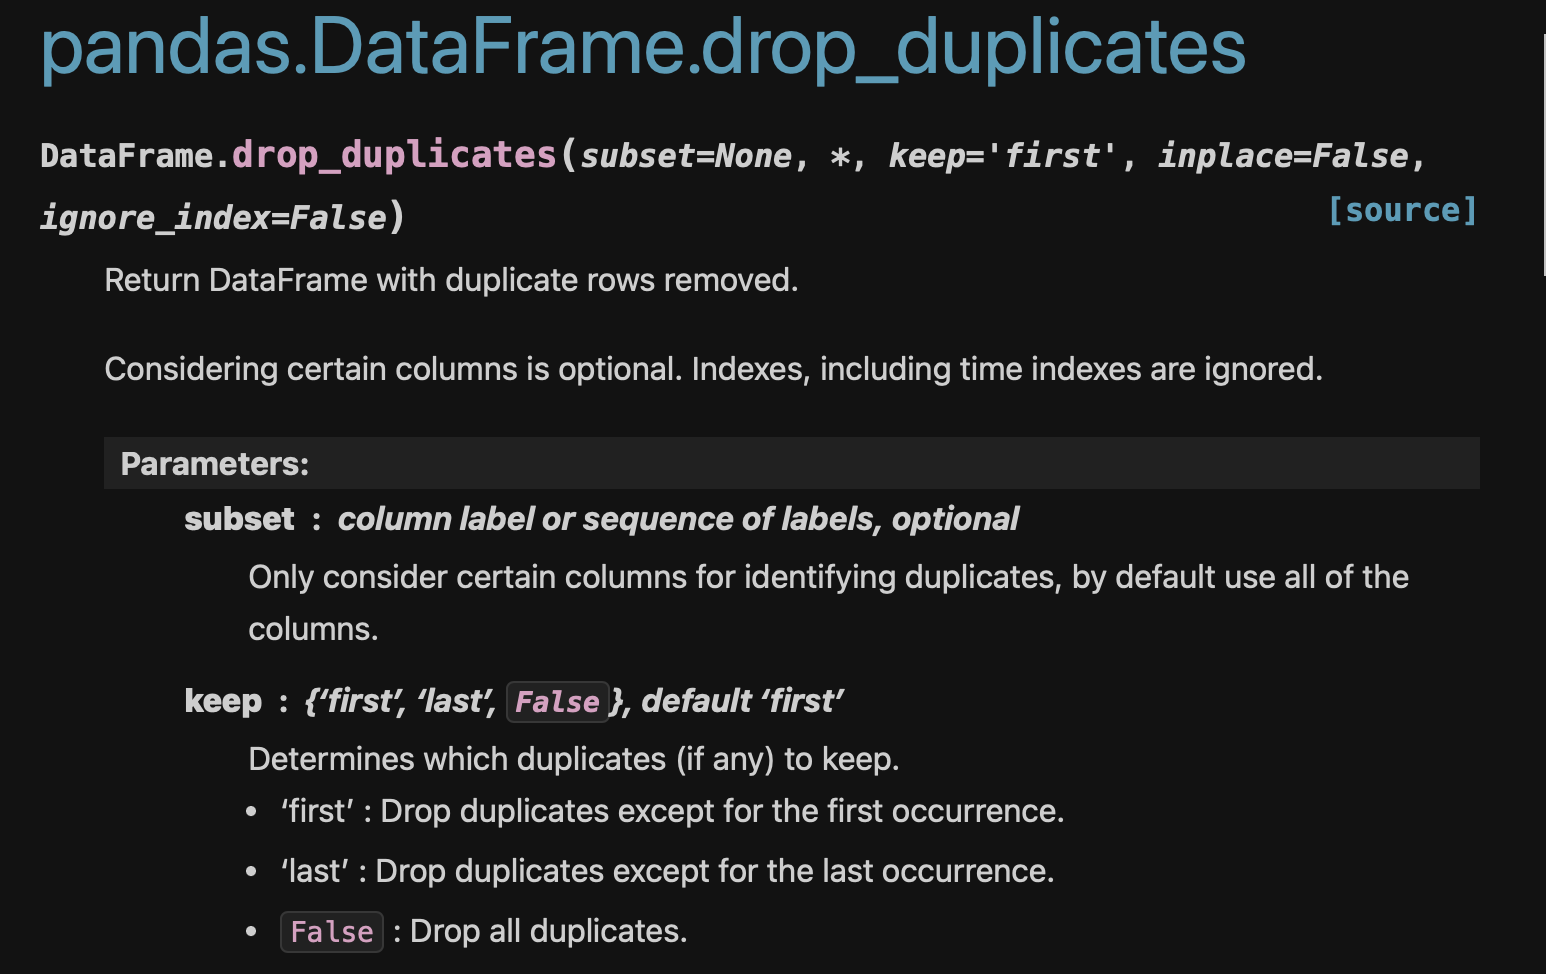

# ข้อมูลบางตัวในชุดข้อมูลมีลักษณะผิดปกติหรือแตกต่างจากข้อมูลส่วนใหญ่ (Outlier)

# ค่าตัวแปรบางตัวที่ไม่ถูกต้อง (Erroneous Data)

In [ ]:
shopping_data.sort_values(by='age')

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
69089,I907811,C167489,Male,18,Shoes,3,1800.51,Debit Card,12/9/2022,Kanyon
95060,I128262,C687788,Male,18,Toys,4,143.36,Cash,2/5/2021,Mall of Istanbul
78728,I280590,C142284,Female,18,Clothing,2,600.16,Debit Card,26/10/2022,Forum Istanbul
55784,I210628,C525437,Female,18,Books,2,30.30,Cash,30/09/2022,Forum Istanbul
2443,I115916,C338582,Male,18,Shoes,5,3000.85,Debit Card,23/08/2022,Istinye Park
...,...,...,...,...,...,...,...,...,...,...
66267,I433176,C202678,Male,69,Toys,5,179.20,Credit Card,27/03/2021,Istinye Park
66279,I213234,C176169,Female,69,Shoes,2,1200.34,Credit Card,7/10/2021,Viaport Outlet
85428,I117055,C208685,Female,69,Souvenir,2,23.46,Cash,15/09/2022,Metrocity
66133,I288825,C345511,Female,69,Clothing,1,300.08,Credit Card,23/07/2021,Mall of Istanbul


# ข้อมูลมีค่าตัวแปรไม่สอดคล้องซึ่งกันและกัน (Inconsistent)

## Example

เกิดเมื่อรวมข้อมูลจากหลาย ๆ แหล่งแล้ว ค่าใน col ไม่เป็นไปในทิศทางเดียวกัน เช่น column อายุไม่ตรงกับ column วันเกิดหลังจากการคำนวณอายุแล้ว

## Fix

### เลือกเก็บเฉพาะ column ที่ถูกต้องและเหมาะสมที่สุด

# Data Integration (การรวมข้อมูลจากแหล่งข้อมูลหลายๆ แหล่ง)

## 1. รวมแกน Y (add rows - เพิ่ม Data)

เกิดตอนที่ data ที่มีหลายเวอชัน มีหลายๆปี แล้วนำมาต่อกัน

## 2. รวมแกน X (add columns - เพิ่ม feature)

# Data Reduction (การลดปริมาณข้อมูลในการวิเคราะห์ข้อมูล)

## Reuduce number of data (Y-axis) - Sampling

### Sampling แบบกำหนดค่า Seed

In [ ]:
shopping_data.sample(random_state=6)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
81034,I209459,C312307,Female,18,Souvenir,1,11.73,Cash,13/05/2021,Cevahir AVM


### Sampling แบบกำหนดค่า n

In [ ]:
shopping_data.sample(10, random_state=6)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
81034,I209459,C312307,Female,18,Souvenir,1,11.73,Cash,13/05/2021,Cevahir AVM
91838,I351059,C292856,Male,41,Clothing,2,600.16,Credit Card,9/7/2021,Metropol AVM
20458,I323617,C325754,Female,24,Clothing,2,600.16,Credit Card,1/2/2022,Istinye Park
73343,I104653,C209092,Male,62,Toys,5,179.20,Cash,19/11/2022,Cevahir AVM
70406,I804767,C196027,Female,65,Clothing,3,900.24,Credit Card,28/03/2022,Istinye Park
65247,I137393,C726791,Female,37,Food & Beverage,3,15.69,Credit Card,19/10/2022,Kanyon
49419,I650563,C283975,Male,28,Clothing,3,900.24,Debit Card,11/6/2021,Mall of Istanbul
90371,I109001,C901685,Female,36,Toys,3,107.52,Credit Card,15/09/2022,Istinye Park
98492,I394097,C307872,Male,29,Food & Beverage,1,5.23,Credit Card,10/11/2022,Cevahir AVM
11309,I163506,C223150,Male,34,Food & Beverage,1,5.23,Cash,17/10/2021,Kanyon


### Sampling แบบกำหนดเป็น %

In [ ]:
shopping_data.sample(frac=0.2, random_state=6)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
81034,I209459,C312307,Female,18,Souvenir,1,11.73,Cash,13/05/2021,Cevahir AVM
91838,I351059,C292856,Male,41,Clothing,2,600.16,Credit Card,9/7/2021,Metropol AVM
20458,I323617,C325754,Female,24,Clothing,2,600.16,Credit Card,1/2/2022,Istinye Park
73343,I104653,C209092,Male,62,Toys,5,179.20,Cash,19/11/2022,Cevahir AVM
70406,I804767,C196027,Female,65,Clothing,3,900.24,Credit Card,28/03/2022,Istinye Park
...,...,...,...,...,...,...,...,...,...,...
75991,I189802,C338933,Female,63,Clothing,3,900.24,Credit Card,28/06/2021,Mall of Istanbul
85083,I121218,C125359,Male,42,Clothing,3,900.24,Debit Card,14/10/2021,Metrocity
55086,I365478,C904439,Female,62,Clothing,4,1200.32,Credit Card,19/01/2023,Viaport Outlet
1096,I145120,C293612,Female,60,Clothing,4,1200.32,Debit Card,4/2/2023,Metrocity


### Sampling แบบคืนค่า

In [ ]:
sam_no_replc = shopping_data.sample(frac=0.2, random_state=6)
sam_no_replc.duplicated().any() # ไม่มีซ้ำ เพราะแต่ละตัวมันจับกันแค่รอบเดียว

False

In [ ]:
sam_with_replc = shopping_data.sample(frac=0.2, replace=True, random_state=6)
sam_with_replc.duplicated().any() # Output=True แสดงว่า มีบาง data ที่ถูกสุ่มมา 2 รอบ

True

### Sampling แบบเพิ่มจำนวนข้อมูล

In [ ]:
sam_with_replc_120 = shopping_data.sample(frac=1.2, replace=True, random_state=6)
sam_with_replc_120.shape

(119348, 10)